In [1]:
import numpy                       as np
import pandas                      as pd
import matplotlib.pyplot           as plt
import seaborn                     as sns; sns.set()
from sklearn.model_selection       import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics               import confusion_matrix, accuracy_score
from sklearn.preprocessing         import LabelEncoder
from sklearn.ensemble              import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.svm                   import LinearSVC,SVC
from nameparser                    import HumanName
from sklearn                       import preprocessing

In [2]:
rng                = np.random.RandomState(42)

In [3]:
trainDataFile      = './data/train.csv'
testDataFile       = './data/test.csv' 
train_df           = pd.read_csv(trainDataFile)
test_df            = pd.read_csv(testDataFile)

#dataframe containing IDs for test data homes
test_IDs_df        = pd.DataFrame({'PassengerId':test_df['PassengerId']}) 

In [4]:
titles        = pd.DataFrame(index=train_df.index,columns=['Title'])#empty at the moment
titles_test   = pd.DataFrame(index=test_df.index,columns=['Title'])

In [5]:
#This loop is where the titles are determined
j = 0
for i in train_df['Name']:
    name = HumanName(i)
    titles.loc[train_df.index[j]] = [name.title]
    j = j+1
j = 0
for i in test_df['Name']:
    name = HumanName(i)
    titles_test.loc[test_df.index[j]] = [name.title]
    j = j+1

In [6]:
#Concatenate features and features_titles
train_df = pd.concat([train_df,titles],axis=1)
test_df  = pd.concat([test_df,titles_test],axis=1)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


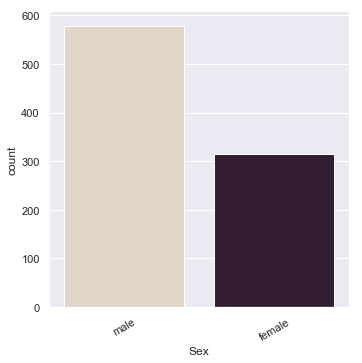

In [8]:
g = sns.catplot(x='Sex',data=train_df,kind="count", palette="ch:.25")
g.set_xticklabels(rotation=30)
plt.show()

In [9]:
sex             = train_df['Sex']
age             = train_df['Age']
pclass          = train_df['Pclass']
surv_status     = train_df['Survived']
#print( len(train_df[ (train_df['Survived'] == 1) & (train_df['Sex'] == 'female') ] ))
#a =  (survived_status == 1) 
#b =  (sex == 'female')
#print(len(train_df[a & b]))

In [10]:
num_female = len( train_df[sex == 'female'] )
num_male   = len( train_df[sex == 'male'] )
tot_pass   = num_female + num_male

female_surv            = len( train_df[(sex == 'female') & (surv_status == 1)])
print('female survive over total females = ', female_surv/num_female)
print('female survive over total passengers = ', female_surv/tot_pass)

male_surv              = len( train_df[(sex == 'male') & (surv_status == 1)])
print('male survive over total males = ', male_surv/num_male)
print('male survive over total passengers = ', male_surv/tot_pass)


total_surv             = len( train_df[(surv_status == 1)])
print('fraction survived = ', total_surv/tot_pass)

female survive over total females =  0.7420382165605095
female survive over total passengers =  0.2615039281705948
male survive over total males =  0.18890814558058924
male survive over total passengers =  0.122334455667789
fraction survived =  0.3838383838383838


In [11]:
class3_surv = len(train_df[(pclass == 3) & (surv_status == 1)])
class2_surv = len(train_df[(pclass == 2) & (surv_status == 1)])
class1_surv = len(train_df[(pclass == 1) & (surv_status == 1)])

class3 = len(train_df[(pclass == 3)])
class2 = len(train_df[(pclass == 2)])
class1 = len(train_df[(pclass == 1)])

print('fraction of class 3 to survive = ', class3_surv/class3)
print('fraction of class 2 to survive = ', class2_surv/class2)
print('fraction of class 1 to survive = ', class1_surv/class1)


fraction of class 3 to survive =  0.24236252545824846
fraction of class 2 to survive =  0.47282608695652173
fraction of class 1 to survive =  0.6296296296296297


count    355.000000
mean      25.140620
std       12.495398
min        0.420000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64


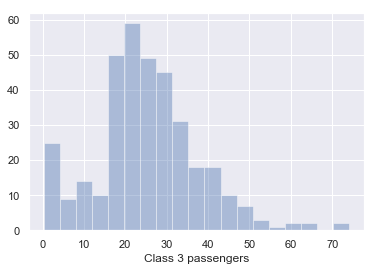

count    173.000000
mean      29.877630
std       14.001077
min        0.670000
25%       23.000000
50%       29.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64


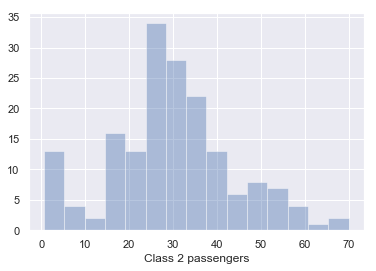

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64


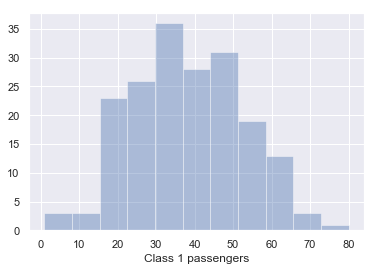

In [12]:
#### Age distributions by class ####
print(train_df[(pclass == 3)]['Age'].describe())
g = sns.distplot(train_df[(pclass == 3)]['Age'].dropna(),kde=False)
g.set(xlabel='Class 3 passengers')
plt.show()

print(train_df[(pclass == 2)]['Age'].describe())
g = sns.distplot(train_df[(pclass == 2)]['Age'].dropna(),kde=False)
g.set(xlabel='Class 2 passengers')
plt.show()

print(train_df[(pclass == 1)]['Age'].describe())
g = sns.distplot(train_df[(pclass == 1)]['Age'].dropna(),kde=False)
g.set(xlabel='Class 1 passengers')
plt.show()

count    85.000000
mean     20.646118
std      11.995047
min       0.420000
25%      14.000000
50%      22.000000
75%      29.000000
max      63.000000
Name: Age, dtype: float64


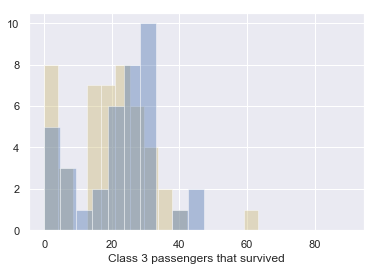

In [18]:
##### Age distributions of surviving passengers by class ####
#print(train_df[(pclass == 3) & (surv_status == 1) ]['Age'].describe())

#bins = np.linspace(0, 80, 30)
#g = sns.distplot(train_df[(pclass == 3) & (surv_status == 1) & (sex == 'female')]['Age'].dropna(),
#                 kde=False, color='y',bins=np.linspace(0, 80, 20))
#sns.distplot(train_df[(pclass == 3) & (surv_status == 1) & (sex == 'male')]['Age'].dropna(),kde=False,bins=np.linspace(0, 90, 20))
#g.set(xlabel='Class 3 passengers that survived')
#plt.show()

count    47.000000
mean     19.329787
std      12.303246
min       0.750000
25%      13.500000
50%      19.000000
75%      26.500000
max      63.000000
Name: Age, dtype: float64
count    38.000000
mean     22.274211
std      11.555786
min       0.420000
25%      16.500000
50%      25.000000
75%      29.750000
max      45.000000
Name: Age, dtype: float64


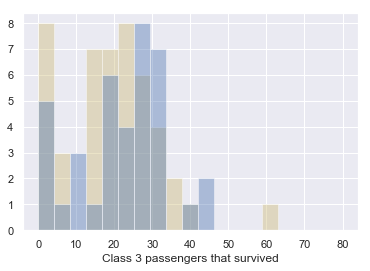

count    68.000000
mean     28.080882
std      12.764693
min       2.000000
25%      21.750000
50%      28.000000
75%      35.250000
max      55.000000
Name: Age, dtype: float64
count    15.000000
mean     16.022000
std      19.547122
min       0.670000
25%       1.000000
50%       3.000000
75%      31.500000
max      62.000000
Name: Age, dtype: float64


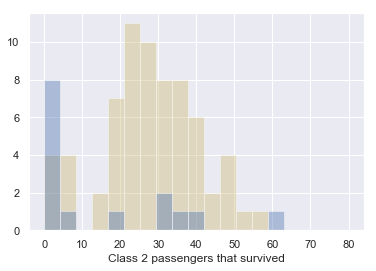

count    82.000000
mean     34.939024
std      13.223014
min      14.000000
25%      23.250000
50%      35.000000
75%      44.000000
max      63.000000
Name: Age, dtype: float64
count    40.000000
mean     36.248000
std      14.936744
min       0.920000
25%      27.000000
50%      36.000000
75%      48.000000
max      80.000000
Name: Age, dtype: float64


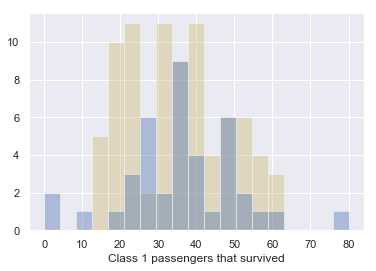

In [25]:
bins = np.linspace(0, 80, 20)

#### Age distributions of surviving passengers by class ####
print(train_df[(pclass == 3) & (surv_status == 1) & (sex == 'female') ]['Age'].describe())
print(train_df[(pclass == 3) & (surv_status == 1) & (sex == 'male') ]['Age'].describe())
g = sns.distplot(train_df[(pclass == 3) & (surv_status == 1) & (sex == 'female')]['Age'].dropna(),
                 kde=False, color='y',bins=bins)
sns.distplot(train_df[(pclass == 3) & (surv_status == 1) & (sex == 'male')]['Age'].dropna(),
             kde=False,bins=np.linspace(0, 80, 20))
g.set(xlabel='Class 3 passengers that survived')
plt.show()

print(train_df[(pclass == 2) & (surv_status == 1) & (sex == 'female') ]['Age'].describe())
print(train_df[(pclass == 2) & (surv_status == 1) & (sex == 'male') ]['Age'].describe())
g = sns.distplot(train_df[(pclass == 2) & (surv_status == 1) & (sex == 'female') ]['Age'].dropna(),
               kde=False, color='y',bins=bins)
sns.distplot(train_df[(pclass == 2) & (surv_status == 1) & (sex == 'male') ]['Age'].dropna(),
             kde=False,bins=bins)
g.set(xlabel='Class 2 passengers that survived')
plt.show()

print(train_df[(pclass == 1) & (surv_status == 1) & (sex == 'female') ]['Age'].describe())
print(train_df[(pclass == 1) & (surv_status == 1) & (sex == 'male') ]['Age'].describe())
g = sns.distplot(train_df[(pclass == 1) & (surv_status == 1) & (sex == 'female')]['Age'].dropna(),
               kde=False, color='y',bins=bins)
sns.distplot(train_df[(pclass == 1) & (surv_status == 1) & (sex == 'male')]['Age'].dropna(),
             kde=False,bins=bins)
g.set(xlabel='Class 1 passengers that survived')
plt.show()

In [26]:
##### Age distributions of surviving passengers by class ####
#g = sns.distplot(train_df[(pclass == 3) & (surv_status == 1) & (sex == 'female') ]['Age'].dropna(),kde=False)
#sns.distplot(train_df[(pclass == 3) & (surv_status == 1) & (sex == 'male') ]['Age'].dropna(),kde=False)
#g.set(xlabel='Class 3 passengers that survived')
#plt.show()


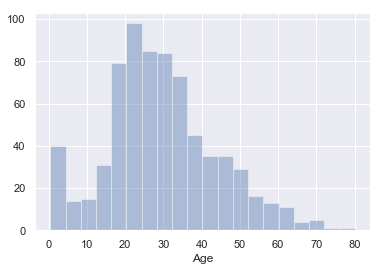

In [27]:
g = sns.distplot(train_df['Age'].dropna(),kde=False)
plt.show()

In [28]:
#drop some of the columns from features.
train_df      = train_df.drop(['PassengerId','Ticket','Cabin'],axis=1)
test_df       = test_df.drop(['PassengerId','Ticket','Cabin'],axis=1)

In [29]:
train_y       = pd.DataFrame({'Survived':train_df['Survived']}) 
train_X       = train_df.drop(['Survived'], axis=1)

In [30]:
dfs = [train_X,test_df]

for df in dfs:

    #produce boolean df's that contain title information
    title  = df['Title']

    master = (title == 'Master.')
    mr     = (title == 'Mr.') 
    dr     = (title == 'Dr.')    
    miss   = ( (title == 'Miss.') | (title == 'Ms.') |
               (title == 'Mlle.') )
    mrs    = ( (title == 'Mrs.') | (title == 'Lady.') |
               (title == 'Mme.') | (title == 'the Countess. of') )

    #CONSIDER MAKING YOUNG ONLY DEPENDENT ON IF SHE HAS PARENTS
    #Separate the 'Miss.' title into the young (who have siblings and/or parents) and
    #into old (who don't have siblings or parents)
    young      = (df['SibSp'] != 0) | (df['Parch'] !=0)
    miss_young = miss & young
    miss_old   = miss & ~young

    #Find the median age for each Title category.
    age_master       = df.loc[master,'Age'].median()
    age_mr           = df.loc[mr,'Age'].median()
    age_dr           = df.loc[dr,'Age'].median()
    age_miss_old     = df.loc[miss_old,'Age'].median()
    age_miss_young   = df.loc[miss_young,'Age'].median()
    age_mrs          = df.loc[mrs,'Age'].median()    


    #Fill in NaN ages with the median age for the correct Title category

    df.loc[master,'Age']     = df.loc[master,'Age'].fillna(age_master)
    df.loc[mr,'Age']         = df.loc[mr,'Age'].fillna(age_mr)
    df.loc[dr,'Age']         = df.loc[dr,'Age'].fillna(age_dr)
    df.loc[miss_old,'Age']   = df.loc[miss_old,'Age'].fillna(age_miss_old)
    df.loc[miss_young,'Age'] = df.loc[miss_young,'Age'].fillna(age_miss_young)    
    df.loc[mrs,'Age']        = df.loc[mrs,'Age'].fillna(age_mrs)

    

    df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True) 
    df['Fare'].fillna(df['Fare'].median(),inplace=True) 
    #df['Age'].fillna(df['Age'].median(),inplace=True) 

In [31]:
train_X = train_X.drop(['Name'],axis=1)
test_df = test_df.drop(['Name'],axis=1)

In [32]:
train_X = pd.get_dummies(train_X, columns=['Sex'])
train_X = pd.get_dummies(train_X, columns=['Embarked'])
train_X = pd.get_dummies(train_X, columns=['Title'])

In [33]:
test_df = pd.get_dummies(test_df, columns=['Sex'])
test_df = pd.get_dummies(test_df, columns=['Embarked'])
test_df = pd.get_dummies(test_df, columns=['Title'])        

In [34]:
print('###before###')
print(train_X.info())
print(test_df.info())

test_df, train_X = test_df.align(train_X,join='inner', axis=1)

print('###after###')
print(train_X.info())
print(test_df.info())

###before###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
Pclass                    891 non-null int64
Age                       891 non-null float64
SibSp                     891 non-null int64
Parch                     891 non-null int64
Fare                      891 non-null float64
Sex_female                891 non-null uint8
Sex_male                  891 non-null uint8
Embarked_C                891 non-null uint8
Embarked_Q                891 non-null uint8
Embarked_S                891 non-null uint8
Title_                    891 non-null uint8
Title_Capt.               891 non-null uint8
Title_Col.                891 non-null uint8
Title_Dr.                 891 non-null uint8
Title_Lady.)              891 non-null uint8
Title_Master.             891 non-null uint8
Title_Miss.               891 non-null uint8
Title_Mlle.               891 non-null uint8
Title_Mme.                891 non-null uint8
Title_Mr.              

In [35]:
#train_X = train_X.drop(['Title_Rev.'],axis=1)
#test_df = test_df.drop(['Title_Rev.'],axis=1)

#train_X = train_X.drop(['Title_Dr.'],axis=1)
#test_df = test_df.drop(['Title_Dr.'],axis=1)

In [36]:
#scale data
scaler              = preprocessing.StandardScaler()
scaler.fit(train_X)
np_train_X          = scaler.transform(train_X.values) #this converts pandas dataframe to numpy
np_test_df          = scaler.transform(test_df.values)

train_X   = pd.DataFrame(np_train_X, index=train_X.index, columns=train_X.columns)
test_df   = pd.DataFrame(np_test_df, index=test_df.index, columns=test_df.columns)

In [37]:
rows,cols             = train_y.shape
train_y_reshape = train_y.values.reshape(rows,) 

In [43]:
print( '::::::gradient boosting::::::\n')
lam = [1,2,3,4,5,6,10,15,20,30,50,100]
#gradient boosting
for l in lam:
    print('parameter= %f\n' % l)
    clf_gbm = GradientBoostingClassifier(n_estimators=350,max_depth=l,learning_rate=0.01,
                                             min_samples_split=4,min_samples_leaf=1)    
    clf_gbm.fit(train_X,train_y_reshape)
    pred_y_gbm = cross_val_predict(clf_gbm,train_X,train_y_reshape,cv=5)
    m = confusion_matrix(train_y_reshape,pred_y_gbm)
    print('confusion matrix elements\n')
    print(m)
    print('cross val score = %f \n' %
               np.average(cross_val_score(clf_gbm,train_X,train_y_reshape,cv=10, scoring='accuracy'))) 


print( '\n::::::logistic regression::::::\n')        
lam = [0.001,0.01,0.1,1.,10.,100.,1000.]
for l in lam:
    print('parameter= %f\n' % l)    
    clf_logit = LogisticRegression(penalty='l2',C=l,solver='newton-cg')
    clf_logit.fit(train_X,train_y_reshape)
    pred_y_logit = cross_val_predict(clf_logit,train_X,train_y_reshape,cv=5)
    m = confusion_matrix(train_y_reshape,pred_y_logit)
    print('confusion matrix elements\n')
    print(m)
    print('cross val score = %f \n' %
               np.average(cross_val_score(clf_logit,train_X,train_y_reshape,cv=10, scoring='accuracy')))

print( '\n::::::random forest::::::\n')
lam = [2,5,8,10,15,30,50,70,100,150]
#n_estimators = 300 best, acc=.669,trace=353
#default max_depth is best
for l in lam:
    print('parameter= %f\n' % l)    
    clf_rf = RandomForestClassifier(n_estimators=300,max_depth=l)    
    clf_rf.fit(train_X,train_y_reshape)
    pred_y_rf = cross_val_predict(clf_rf,train_X,train_y_reshape,cv=5)    
    m = confusion_matrix(train_y_reshape,pred_y_rf)
    print('confusion matrix elements\n')
    print(m)
    print('cross val score = %f \n' %
               np.average(cross_val_score(clf_rf,train_X,train_y_reshape,cv=10, scoring='accuracy')))        


print( '\n::::::Linear SVM::::::\n')
lam = [0.001,0.01,0.02,0.04,0.06,0.08,0.10,1.0,5.0]    
for l in lam:
    print('parameter= %f\n' % l)    
    clf_lsvm = LinearSVC(C=l)
    clf_lsvm.fit(train_X,train_y_reshape)
    pred_y_lsvm = cross_val_predict(clf_lsvm,train_X,train_y_reshape,cv=5)        
    m = confusion_matrix(train_y_reshape,pred_y_lsvm)
    print('confusion matrix elements\n')
    print(m)
    print('cross val score = %f \n' %
               np.average(cross_val_score(clf_lsvm,train_X,train_y_reshape,cv=10, scoring='accuracy'))) 


::::::gradient boosting::::::

parameter= 1.000000

confusion matrix elements

[[467  82]
 [ 97 245]]
cross val score = 0.800182 

parameter= 2.000000

confusion matrix elements

[[488  61]
 [110 232]]
cross val score = 0.823804 

parameter= 3.000000

confusion matrix elements

[[494  55]
 [105 237]]
cross val score = 0.828361 

parameter= 4.000000

confusion matrix elements

[[496  53]
 [102 240]]
cross val score = 0.831731 

parameter= 5.000000

confusion matrix elements

[[493  56]
 [ 95 247]]
cross val score = 0.838423 

parameter= 6.000000

confusion matrix elements

[[488  61]
 [ 98 244]]
cross val score = 0.832805 

parameter= 10.000000

confusion matrix elements

[[456  93]
 [103 239]]
cross val score = 0.779982 

parameter= 15.000000

confusion matrix elements

[[451  98]
 [ 99 243]]
cross val score = 0.775513 

parameter= 20.000000

confusion matrix elements

[[450  99]
 [101 241]]
cross val score = 0.773278 

parameter= 30.000000

confusion matrix elements

[[454  95]
 [101 

In [41]:
clf_gbm = GradientBoostingClassifier(n_estimators=350,max_depth=3,learning_rate=0.01,
                                             min_samples_split=4,min_samples_leaf=1)    
clf_gbm.fit(train_X,train_y_reshape)
pred_test_gbm = clf_gbm.predict(test_df)

In [42]:
pred = pd.DataFrame({'PassengerId':test_IDs_df['PassengerId'],'Survived':pred_test_gbm})

pred.to_csv('./output/titanic_submission_gbm_new.csv',index=False)